In [1]:
# To execute the multiple lines of code at once
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Load the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

### 1. Business challenge
Detecting fraud transactions is of great importance for any credit card company. We are tasked by a well-known company to detect potential frauds so that customers are not charged for items that they did not purchase. So the goal is to build a classifier that tells if a transaction is a fraud or not.

### 2. Data Understanding
**Information about the data**

The datasets contain transactions made by credit cards in September 2013 by 
European cardholders. This dataset presents transactions that occurred in two days, 
where we have 492 frauds out of 284,807 transactions. The dataset is highly 
unbalanced, the positive class (frauds) account for 0.172% of all transactions. It 
contains only numerical input variables which are the result of a PCA transformation. 
Unfortunately, due to confidentiality issues, we cannot provide the original features 
and more background information about the data. Features V1, V2, … V28 are the 
principal components obtained with PCA, the only features which have not been 
transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds 
elapsed between each transaction and the first transaction in the dataset. The 
feature 'Amount' is the transaction Amount, this feature can be used for exampledependant cost-sensitive learning. Feature 'Class' is the response variable and it 
takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

**Data Exploration**

28 out of 31 columns are PCA generated. We do not have original features and more background information about the data (V1,V2,....V28).

## Step-1 Load the data

In [3]:
df=pd.read_csv(r'C:\Data\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 3.Data Preprocessing

### Step-2 Preprocessing

In [4]:
df.shape

(284807, 31)

In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Check the missing values 

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
import warnings
warnings.filterwarnings('ignore')

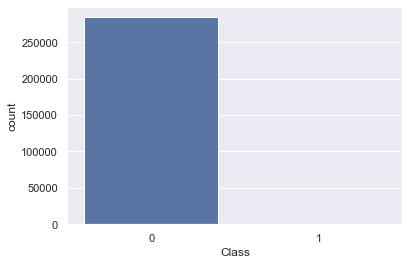

In [10]:
sns.countplot(df["Class"]);

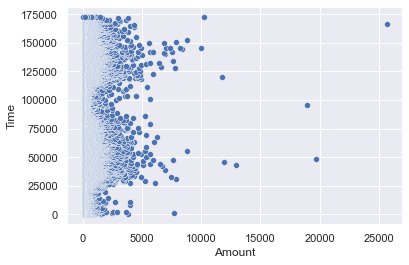

In [11]:
sns.scatterplot(data=df,x=df['Amount'],y=df['Time']);

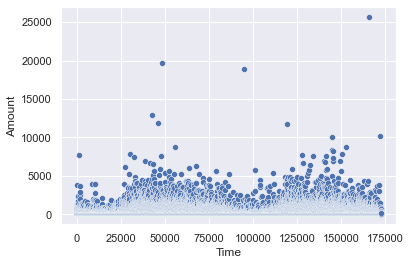

In [12]:
sns.scatterplot(data=df,x='Time',y='Amount');

**Observations**:

From the above two plots it is clearly visible that there are frauds only on the transactions which have transaction amount approximately less than 2500. Transactions which have transaction amount approximately above 2500 have no fraud.
As per with the time, the frauds in the transactions are evenly distributed throughout time.

<AxesSubplot:xlabel='Class', ylabel='Time'>

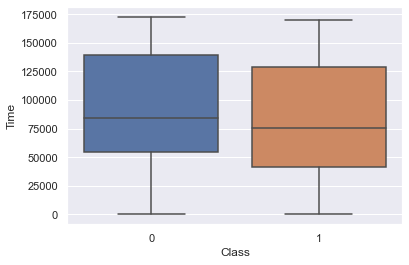

In [13]:
sns.boxplot(x = "Class", y = "Time", data = df)
plt.show()

**Observations**:

By looking at the above box plot we can say that both fraud & genuine transactions occur throughout time and there is no distinction between them.

<AxesSubplot:xlabel='Class', ylabel='Amount'>

(0.0, 5000.0)

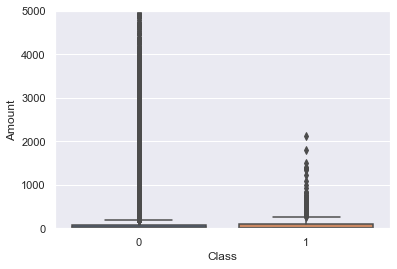

In [14]:
sns.boxplot(x = "Class", y = "Amount", data = df);
plt.ylim(0, 5000)
plt.show()

**Observations**:
 
From above box plot we can easily infer that there are no fraud transactions occur above the transaction amount of 3000. All of the fraud transactions have transaction amount less than 3000. However, there are many transactions which have a transaction amount greater than 3000 and all of them are genuine.

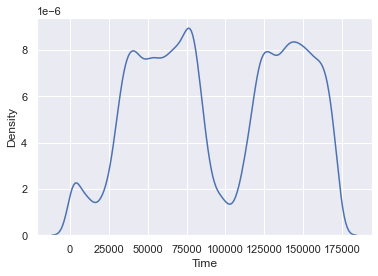

In [15]:
sns.kdeplot(df['Time']);

**Time - Data is collected for 2 days. During the day time, number of transactions are higher than night. Will drop this variable.**

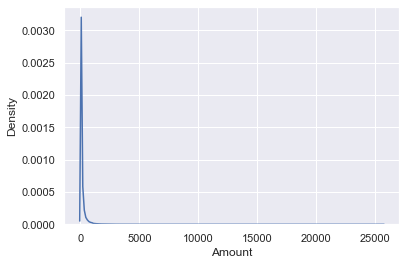

In [16]:
sns.kdeplot(df['Amount']);

**Amount - There are very few transactions of higher values. Lower value transactions dominates the data.**

In [17]:
from sklearn.preprocessing import StandardScaler
df['Amount(Normalized)'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df.iloc[:,[29,31]].head()

,Amount,Amount(Normalized)
0,149.62,0.244964
1,2.69,-0.342475
2,378.66,1.160686
3,123.50,0.140534
4,69.99,-0.073403


### Step-3.Seperate features and Labels

#### Data Preparation

In [18]:
X=df.drop(columns=['Class','Amount','Time'])# This columns(Amount,time) are not necessary anymore.
y=df['Class']

In [19]:
X.shape
y.shape

(284807, 29)

(284807,)

### Step-4:Split the dataset to train and test 

In [20]:
#  Train and Test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
print(X_train.shape,X_test.shape)

(190820, 29) (93987, 29)


In [21]:
# We are transforming data to numpy array to implementing with keras
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

### Step-5: Model Building

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
model1 = Sequential([
    Dense(units=29, input_dim = X_train.shape[1], activation='relu'),
    Dense(1, activation='sigmoid')
])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 29)                870       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 30        
Total params: 900
Trainable params: 900
Non-trainable params: 0
_________________________________________________________________


In [23]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
model2 = Sequential([
    Dense(units=29, input_dim = X_train.shape[1], activation='relu'),
    Dense(units=24,activation='relu'),
    Dense(units=20,activation='relu'),
    Dense(1, activation='sigmoid')
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 29)                870       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                720       
_________________________________________________________________
dense_4 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 2,111
Trainable params: 2,111
Non-trainable params: 0
_________________________________________________________________


In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
model3 = Sequential([
    Dense(units=29, input_dim = X_train.shape[1], activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(units=20,activation='relu'),
    Dense(units=24,activation='relu'),
    Dense(1, activation='sigmoid')
])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 29)                870       
_________________________________________________________________
dense_7 (Dense)              (None, 24)                720       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_9 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 25        
Total params: 2,619
Trainable params: 2,619
Non-trainable params: 0
____________________________________________________

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
model4 = Sequential([
    Dense(units=29, input_dim = X_train.shape[1], activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(units=20,activation='relu'),
    Dropout(0.2),
    Dense(units=24,activation='relu'),
    Dense(1, activation='sigmoid')
])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 29)                870       
_________________________________________________________________
dense_12 (Dense)             (None, 24)                720       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 20)                500       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 24)                504       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
model5 = Sequential([
    Dense(units=29, input_dim = X_train.shape[1], activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(units=20,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.2),
    Dense(units=6,activation='relu'),
    Dense(1, activation='sigmoid')
])
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 29)                870       
_________________________________________________________________
dense_17 (Dense)             (None, 24)                720       
_________________________________________________________________
dropout_3 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 20)                500       
_________________________________________________________________
dense_19 (Dense)             (None, 24)                504       
_________________________________________________________________
dropout_4 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 6)                

**I use Rectified Linear Unit (ReLU) as an activation function for the hidden layers. ReLU normally performs better than Sigmoid and Hyperbolic Tangent functions when building deep neural networks**

In [44]:
from keras.layers import LeakyReLU

In [38]:
# model6 = Sequential([
#     Dense(units=64, input_dim = X_train.shape[1], activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
#     Dropout(0.5),
#     Dense(units=6,activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
#     Dense(1, activation='sigmoid')
# ])
# model6.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 64)                1920      
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_55 (Dense)             (None, 6)                 390       
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 7         
Total params: 2,317
Trainable params: 2,317
Non-trainable params: 0
_________________________________________________________________


### model evaluation

In [27]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history1=model1.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=30, epochs=5)

Epoch 1/5
6361/6361 [==============================] - 8s 1ms/step - loss: 0.0197 - accuracy: 0.9954 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 2/5
6361/6361 [==============================] - 6s 880us/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 3/5
6361/6361 [==============================] - 5s 844us/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 4/5
6361/6361 [==============================] - 8s 1ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0034 - val_accuracy: 0.9991
Epoch 5/5
6361/6361 [==============================] - 7s 1ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0039 - val_accuracy: 0.9994


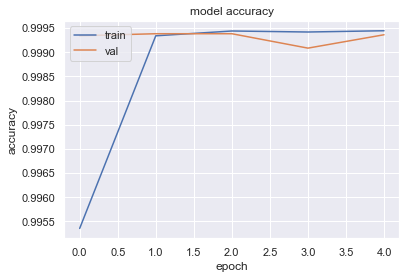

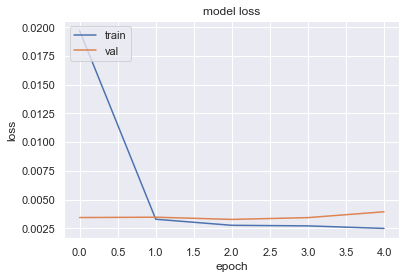

In [28]:
plt.plot(history1.history['accuracy']);
plt.plot(history1.history['val_accuracy']);
plt.title('model accuracy');
plt.ylabel('accuracy');
plt.xlabel('epoch');
plt.legend(['train', 'val'], loc='upper left');
plt.show();
# summarize history for loss
plt.plot(history1.history['loss']);
plt.plot(history1.history['val_loss']);
plt.title('model loss');
plt.ylabel('loss');
plt.xlabel('epoch');
plt.legend(['train', 'val'], loc='upper left');
plt.show();

In [29]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history2=model2.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=30, epochs=5)

Epoch 1/5
6361/6361 [==============================] - 6s 993us/step - loss: 0.0098 - accuracy: 0.9980 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 2/5
6361/6361 [==============================] - 6s 942us/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 3/5
6361/6361 [==============================] - 6s 952us/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 4/5
6361/6361 [==============================] - 6s 940us/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 5/5
6361/6361 [==============================] - 6s 940us/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0034 - val_accuracy: 0.9994


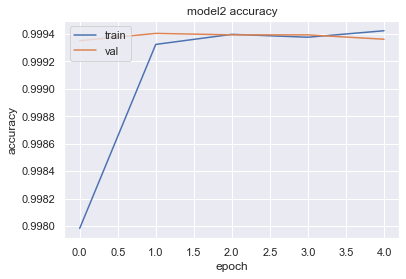

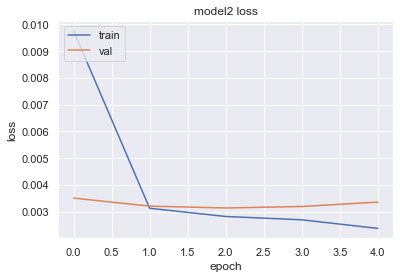

In [30]:
plt.plot(history2.history['accuracy']);
plt.plot(history2.history['val_accuracy']);
plt.title('model2 accuracy');
plt.ylabel('accuracy');
plt.xlabel('epoch');
plt.legend(['train', 'val'], loc='upper left');
plt.show();
# summarize history for loss
plt.plot(history2.history['loss']);
plt.plot(history2.history['val_loss']);
plt.title('model2 loss');
plt.ylabel('loss');
plt.xlabel('epoch');
plt.legend(['train', 'val'], loc='upper left');
plt.show();

In [31]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history3=model3.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=30, epochs=5)

Epoch 1/5
6361/6361 [==============================] - 7s 1ms/step - loss: 0.0107 - accuracy: 0.9989 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 2/5
6361/6361 [==============================] - 6s 1ms/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0036 - val_accuracy: 0.9994
Epoch 3/5
6361/6361 [==============================] - 8s 1ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 4/5
6361/6361 [==============================] - 8s 1ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 5/5
6361/6361 [==============================] - 6s 1ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0036 - val_accuracy: 0.9994


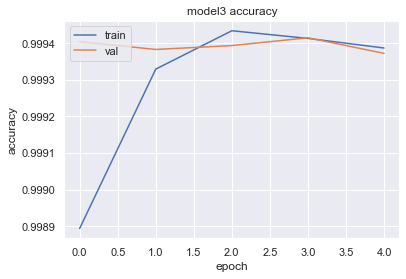

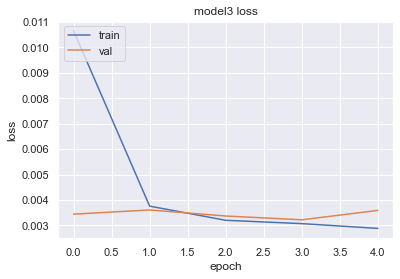

In [32]:
plt.plot(history3.history['accuracy']);
plt.plot(history3.history['val_accuracy']);
plt.title('model3 accuracy');
plt.ylabel('accuracy');
plt.xlabel('epoch');
plt.legend(['train', 'val'], loc='upper left');
plt.show();
# summarize history for loss
plt.plot(history3.history['loss']);
plt.plot(history3.history['val_loss']);
plt.title('model3 loss');
plt.ylabel('loss');
plt.xlabel('epoch');
plt.legend(['train', 'val'], loc='upper left');
plt.show();

In [33]:
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history4=model4.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=30, epochs=5)

Epoch 1/5
6361/6361 [==============================] - 7s 1ms/step - loss: 0.0116 - accuracy: 0.9979 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 2/5
6361/6361 [==============================] - 7s 1ms/step - loss: 0.0040 - accuracy: 0.9992 - val_loss: 0.0039 - val_accuracy: 0.9992
Epoch 3/5
6361/6361 [==============================] - 7s 1ms/step - loss: 0.0037 - accuracy: 0.9994 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 4/5
6361/6361 [==============================] - 7s 1ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0046 - val_accuracy: 0.9994
Epoch 5/5
6361/6361 [==============================] - 7s 1ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0036 - val_accuracy: 0.9993


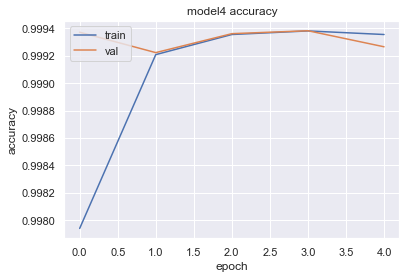

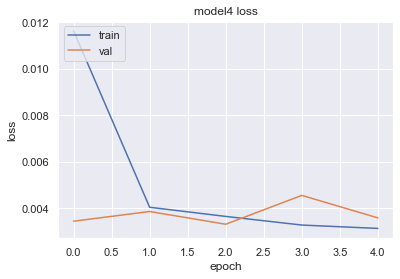

In [34]:
plt.plot(history4.history['accuracy']);
plt.plot(history4.history['val_accuracy']);
plt.title('model4 accuracy');
plt.ylabel('accuracy');
plt.xlabel('epoch');
plt.legend(['train', 'val'], loc='upper left');
plt.show();
# summarize history for loss
plt.plot(history4.history['loss']);
plt.plot(history4.history['val_loss']);
plt.title('model4 loss');
plt.ylabel('loss');
plt.xlabel('epoch');
plt.legend(['train', 'val'], loc='upper left');
plt.show();

In [35]:
model5 .compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history5=model5.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=30, epochs=5)

Epoch 1/5
6361/6361 [==============================] - 7s 1ms/step - loss: 0.0128 - accuracy: 0.9976 - val_loss: 0.0036 - val_accuracy: 0.9994
Epoch 2/5
6361/6361 [==============================] - 7s 1ms/step - loss: 0.0042 - accuracy: 0.9992 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 3/5
6361/6361 [==============================] - 8s 1ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0041 - val_accuracy: 0.9994
Epoch 4/5
6361/6361 [==============================] - 9s 1ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0039 - val_accuracy: 0.9993
Epoch 5/5
6361/6361 [==============================] - 13s 2ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0041 - val_accuracy: 0.9994


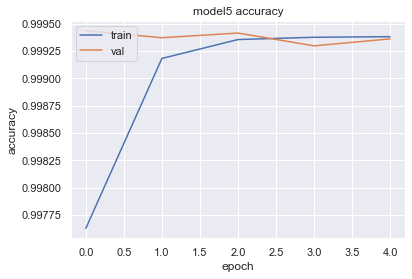

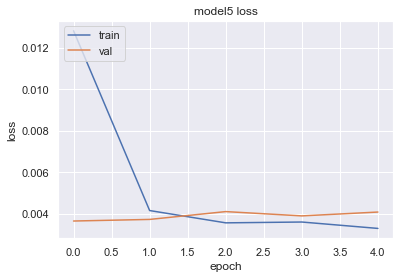

In [36]:
plt.plot(history5.history['accuracy']);
plt.plot(history5.history['val_accuracy']);
plt.title('model5 accuracy');
plt.ylabel('accuracy');
plt.xlabel('epoch');
plt.legend(['train', 'val'], loc='upper left');
plt.show();
# summarize history for loss
plt.plot(history5.history['loss']);
plt.plot(history5.history['val_loss']);
plt.title('model5 loss');
plt.ylabel('loss');
plt.xlabel('epoch');
plt.legend(['train', 'val'], loc='upper left');
plt.show();

**I use here a ‘binary_crossentropy’ as the loss function and ‘Adam’ to update network weights. ‘Adam’ is a popular algorithm to achieve good results fast in the deep learning field.**

In [37]:
score = model1.evaluate(X_test, y_test)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(score[1]*100,score[0]))

2938/2938 [==============================] - 3s 962us/step - loss: 0.0039 - accuracy: 0.99940s -
Test Accuracy: 99.94%
Test Loss: 0.003938933368772268


In [38]:
score = model2.evaluate(X_test, y_test)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(score[1]*100,score[0]))

2938/2938 [==============================] - 3s 918us/step - loss: 0.0034 - accuracy: 0.9994
Test Accuracy: 99.94%
Test Loss: 0.0033613138366490602


In [39]:
score = model3.evaluate(X_test, y_test)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(score[1]*100,score[0]))

2938/2938 [==============================] - 2s 740us/step - loss: 0.0036 - accuracy: 0.9994
Test Accuracy: 99.94%
Test Loss: 0.003591007785871625


In [40]:
score = model4.evaluate(X_test, y_test)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(score[1]*100,score[0]))

2938/2938 [==============================] - ETA: 0s - loss: 0.0036 - accuracy: 0.99 - 1s 509us/step - loss: 0.0036 - accuracy: 0.9993
Test Accuracy: 99.93%
Test Loss: 0.003591444343328476


In [41]:
score = model5.evaluate(X_test, y_test)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(score[1]*100,score[0]))

2938/2938 [==============================] - 2s 827us/step - loss: 0.0041 - accuracy: 0.99940s - l
Test Accuracy: 99.94%
Test Loss: 0.004081806167960167


<AxesSubplot:>

Text(0.5, 1.0, 'Model1')

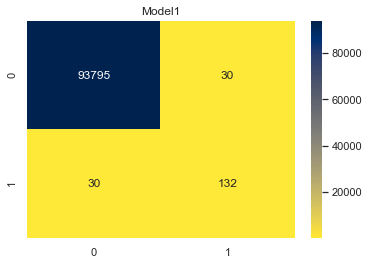

In [42]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred1 = model1.predict(X_test)
y_test = pd.DataFrame(y_test)
cm = confusion_matrix(y_test, y_pred1.round())
sns.heatmap(cm, annot=True, fmt='.0f', cmap='cividis_r')
plt.title("Model1")
plt.show()

<AxesSubplot:>

Text(0.5, 1.0, 'Model2')

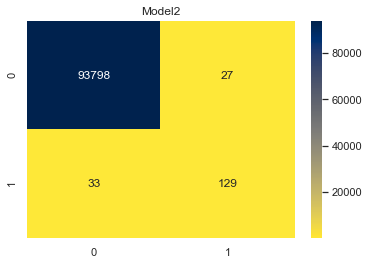

In [43]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred2 = model2.predict(X_test)
y_test = pd.DataFrame(y_test)
cm = confusion_matrix(y_test, y_pred2.round())
sns.heatmap(cm, annot=True, fmt='.0f', cmap='cividis_r')
plt.title("Model2")
plt.show()

<AxesSubplot:>

Text(0.5, 1.0, 'Model3')

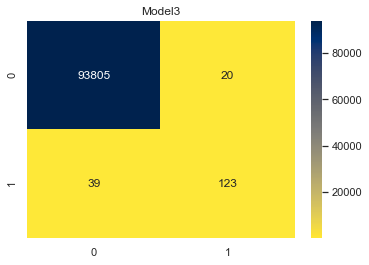

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred3 = model3.predict(X_test)
y_test = pd.DataFrame(y_test)
cm = confusion_matrix(y_test, y_pred3.round())
sns.heatmap(cm, annot=True, fmt='.0f', cmap='cividis_r')
plt.title("Model3")
plt.show()

<AxesSubplot:>

Text(0.5, 1.0, 'Model4')

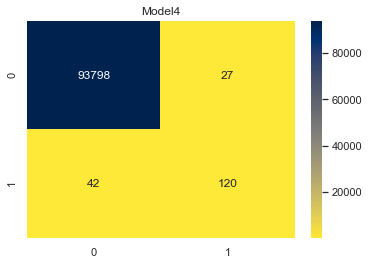

In [45]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred4= model4.predict(X_test)
y_test = pd.DataFrame(y_test)
cm = confusion_matrix(y_test, y_pred4.round())
sns.heatmap(cm, annot=True, fmt='.0f', cmap='cividis_r')
plt.title("Model4")
plt.show()

<AxesSubplot:>

Text(0.5, 1.0, 'Model5')

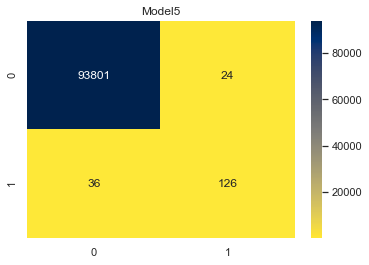

In [46]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred5 = model5.predict(X_test)
y_test = pd.DataFrame(y_test)
cm = confusion_matrix(y_test, y_pred5.round())
sns.heatmap(cm, annot=True, fmt='.0f', cmap='cividis_r')
plt.title("Model5")
plt.show()

Does such a high accuracy indicate good performance? 
* If you recall, accuracy is the sum of Ture Negative and True Positive divided by total dataset size. If 95% of the dataset is Negative (non-frauds), the network will cleverly predict all to be Negative, leading to 95% accuracy. However, for fraud detection, detecting Positive matters more than detecting Negative. Therefore, we need better metrics.
* The above figure shows the confusion matrix using the test dataset. DNN shows a precision of 80%, a recall of 84%, and an F1 score of 82.0%. About 20% of frauds are misclassified as non-frauds, leading to these extra payments for the customers, though the accuracy is 99.94%. So there is enough space to improve the DNN model 

In [47]:
print(classification_report(y_pred1.round(), y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     93825
         1.0       0.81      0.81      0.81       162

    accuracy                           1.00     93987
   macro avg       0.91      0.91      0.91     93987
weighted avg       1.00      1.00      1.00     93987



In [48]:
print(classification_report(y_pred2.round(), y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     93831
         1.0       0.80      0.83      0.81       156

    accuracy                           1.00     93987
   macro avg       0.90      0.91      0.91     93987
weighted avg       1.00      1.00      1.00     93987



In [49]:
print(classification_report(y_pred3.round(), y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     93844
         1.0       0.76      0.86      0.81       143

    accuracy                           1.00     93987
   macro avg       0.88      0.93      0.90     93987
weighted avg       1.00      1.00      1.00     93987



In [50]:
print(classification_report(y_pred4.round(), y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     93840
         1.0       0.74      0.82      0.78       147

    accuracy                           1.00     93987
   macro avg       0.87      0.91      0.89     93987
weighted avg       1.00      1.00      1.00     93987



In [51]:
print(classification_report(y_pred5.round(), y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     93837
         1.0       0.78      0.84      0.81       150

    accuracy                           1.00     93987
   macro avg       0.89      0.92      0.90     93987
weighted avg       1.00      1.00      1.00     93987



### Hyperparemeter tuning

**Model2 and model4 gave less precision and recall so that i can tune the other models how other optimizers works** i.e increasing batch size and epochs, change optimezer

In [52]:
model3.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])
history11=model3.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=50, epochs=5)

Epoch 1/5
3817/3817 [==============================] - 6s 2ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 2/5
3817/3817 [==============================] - 6s 1ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 3/5
3817/3817 [==============================] - 6s 1ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 4/5
3817/3817 [==============================] - 6s 1ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 5/5
3817/3817 [==============================] - 7s 2ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0032 - val_accuracy: 0.9994


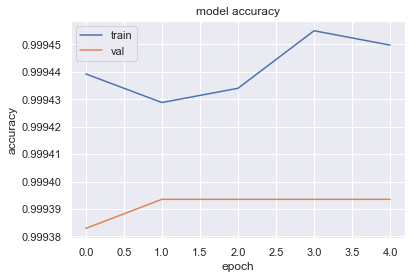

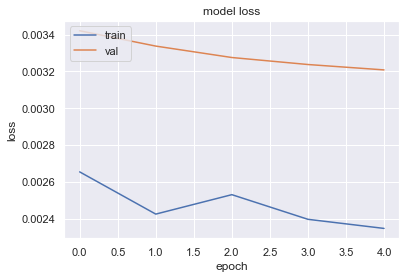

In [53]:
plt.plot(history11.history['accuracy']);
plt.plot(history11.history['val_accuracy']);
plt.title('model accuracy');
plt.ylabel('accuracy');
plt.xlabel('epoch');
plt.legend(['train', 'val'], loc='upper left');
plt.show();
# summarize history for loss
plt.plot(history11.history['loss']);
plt.plot(history11.history['val_loss']);
plt.title('model loss');
plt.ylabel('loss');
plt.xlabel('epoch');
plt.legend(['train', 'val'], loc='upper left');
plt.show();

### Observations:
    Here I use Adagrad optimizer which gives very poor accuracy so Adam is the best optimizer

In [54]:
model3.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
history12=model3.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=70, epochs=5)

Epoch 1/5
2726/2726 [==============================] - 4s 1ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 2/5
2726/2726 [==============================] - 4s 1ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 3/5
2726/2726 [==============================] - 3s 1ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 4/5
2726/2726 [==============================] - 3s 996us/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 5/5
2726/2726 [==============================] - 4s 1ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0032 - val_accuracy: 0.9994


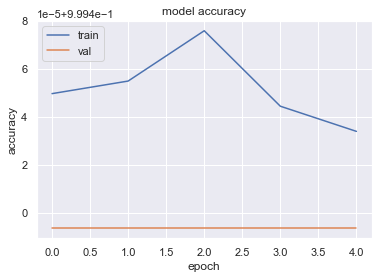

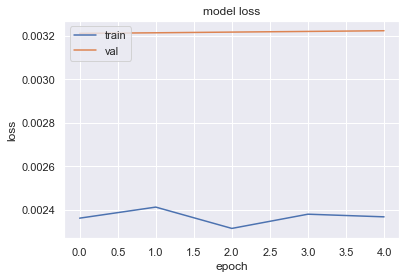

In [55]:
plt.plot(history12.history['accuracy']);
plt.plot(history12.history['val_accuracy']);
plt.title('model accuracy');
plt.ylabel('accuracy');
plt.xlabel('epoch');
plt.legend(['train', 'val'], loc='upper left');
plt.show();
# summarize history for loss
plt.plot(history12.history['loss']);
plt.plot(history12.history['val_loss']);
plt.title('model loss');
plt.ylabel('loss');
plt.xlabel('epoch');
plt.legend(['train', 'val'], loc='upper left');
plt.show();

#### Observations:
    Adadelta is also gives bad accuracy and constant loss(there is no decrement in loss)

In [56]:
from keras.optimizers import Adam
model5.compile(optimizer=Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
history13=model5.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=90, epochs=5)

Epoch 1/5
2121/2121 [==============================] - 3s 1ms/step - loss: 0.0062 - accuracy: 0.9988 - val_loss: 0.0036 - val_accuracy: 0.9993
Epoch 2/5
2121/2121 [==============================] - 4s 2ms/step - loss: 0.0054 - accuracy: 0.9990 - val_loss: 0.0047 - val_accuracy: 0.9994
Epoch 3/5
2121/2121 [==============================] - 4s 2ms/step - loss: 0.0055 - accuracy: 0.9989 - val_loss: 0.0052 - val_accuracy: 0.9983
Epoch 4/5
2121/2121 [==============================] - 5s 2ms/step - loss: 0.0049 - accuracy: 0.9990 - val_loss: 0.0047 - val_accuracy: 0.9993
Epoch 5/5
2121/2121 [==============================] - 5s 2ms/step - loss: 0.0050 - accuracy: 0.9992 - val_loss: 0.0109 - val_accuracy: 0.9993


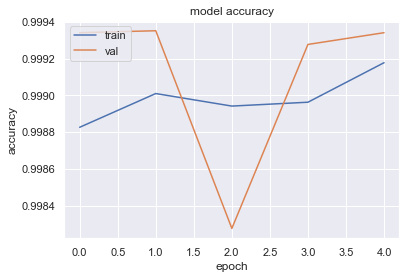

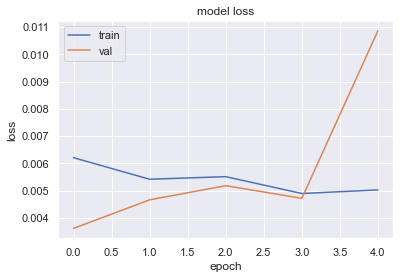

In [57]:
plt.plot(history13.history['accuracy']);
plt.plot(history13.history['val_accuracy']);
plt.title('model accuracy');
plt.ylabel('accuracy');
plt.xlabel('epoch');
plt.legend(['train', 'val'], loc='upper left');
plt.show();
# summarize history for loss
plt.plot(history13.history['loss']);
plt.plot(history13.history['val_loss']);
plt.title('model loss');
plt.ylabel('loss');
plt.xlabel('epoch');
plt.legend(['train', 'val'], loc='upper left');
plt.show();

In [58]:
model5.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history14=model5.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=90, epochs=5)

Epoch 1/5
2121/2121 [==============================] - 3s 1ms/step - loss: 0.0078 - accuracy: 0.9992 - val_loss: 0.0046 - val_accuracy: 0.9994
Epoch 2/5
2121/2121 [==============================] - 3s 1ms/step - loss: 0.0047 - accuracy: 0.9992 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 3/5
2121/2121 [==============================] - 4s 2ms/step - loss: 0.0037 - accuracy: 0.9992 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 4/5
2121/2121 [==============================] - 4s 2ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 5/5
2121/2121 [==============================] - 4s 2ms/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.0031 - val_accuracy: 0.9994


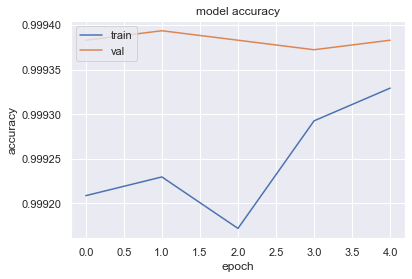

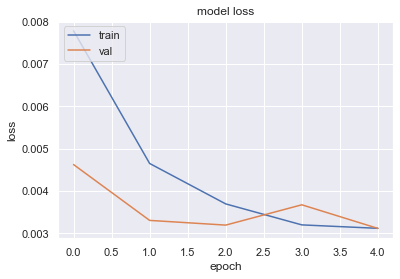

In [59]:
plt.plot(history14.history['accuracy']);
plt.plot(history14.history['val_accuracy']);
plt.title('model accuracy');
plt.ylabel('accuracy');
plt.xlabel('epoch');
plt.legend(['train', 'val'], loc='upper left');
plt.show();
# summarize history for loss
plt.plot(history14.history['loss']);
plt.plot(history14.history['val_loss']);
plt.title('model loss');
plt.ylabel('loss');
plt.xlabel('epoch');
plt.legend(['train', 'val'], loc='upper left');
plt.show();

## Final Observation:
          * ADAM is working better than remaining adagrad and adadelta optimizers.
          * Adam(lr=0.001) is showing good accuracy rate in gragh(Best hyperparameter is 0.001).
          * All Models gives best accuracy the only difference is hidden layers....here the less hidden layers(models 1,2,3)               gives good precision and recall values

### Our results is fine however it is not the best way to do things like that. Since our dataset is unbalanced (we have 492 frauds out of 284,807 transactions) we will use ‘smote sampling’. Basically smote turn our inbalanced data to balanced data.

### Note:- Now In this situation changing our inbalanced data to balanced data is not erroneous thing, because we cannot make a fruad data bigger size using oversampling. But I tried just for knowing purpose how it will come after the smote sampling

#### SMOTE Sampling

In [60]:
from imblearn.over_sampling import SMOTE
X_smote, y_smote = SMOTE().fit_resample(X, y)
X_smote = pd.DataFrame(X_smote)
y_smote = pd.DataFrame(y_smote)
y_smote.iloc[:,0].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model4.fit(X_train, y_train, batch_size = 30, epochs = 5)

Epoch 1/5
13269/13269 [==============================] - 18s 1ms/step - loss: 0.0057 - accuracy: 0.9988
Epoch 2/5
13269/13269 [==============================] - 17s 1ms/step - loss: 0.0050 - accuracy: 0.9989
Epoch 3/5
13269/13269 [==============================] - 14s 1ms/step - loss: 0.0048 - accuracy: 0.9990
Epoch 4/5
13269/13269 [==============================] - 13s 1ms/step - loss: 0.0047 - accuracy: 0.9990
Epoch 5/5
13269/13269 [==============================] - 13s 946us/step - loss: 0.0042 - accuracy: 0.9991


In [75]:
score = model4.evaluate(X_test, y_test)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(score[1]*100,score[0]))

5331/5331 [==============================] - 3s 521us/step - loss: 0.0045 - accuracy: 0.99910s - loss: 0
Test Accuracy: 99.91%
Test Loss: 0.0044919578358531


<AxesSubplot:>

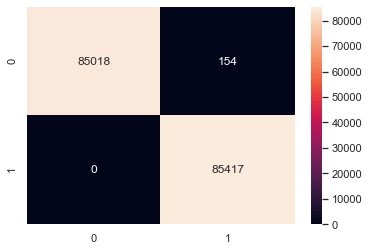

In [76]:
from sklearn.metrics import confusion_matrix
y_pred = model4.predict(X_test)
y_test = pd.DataFrame(y_test)
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm, annot=True, fmt='.0f')
plt.show()

In [77]:
print(classification_report(y_pred.round(), y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85018
         1.0       1.00      1.00      1.00     85571

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

